# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-12 (52일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 이번에는 CA 문석의 이론과 실습을 설명하고, 다음에 다시 예제를 푸는 형식으로 할 예정입니다.
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/120-correspondence-analysis-theory-and-practice/

## 요구 패키지 들
FactorMineR : CA 계산 패키지
factoextra  : 결과를 출력 그래프로 표시

In [1]:
#install.packages("FactoMineR")
#install.packages("factoextra")

In [2]:
# 패키지 로드
library(FactoMineR)
library(factoextra)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


데모 데이터로 housetasks 를 사용합니다. 
* row 는 여러 집안일들을 나타내고
* column 은 누가 일을 한것인지 표시합니다. (아내, 남편, 공동, 위탁) 으로 구분합니다.
* 각 셀의 값은 빈도수를 나타냅니다.

In [3]:
# data 준비 housetasks 는 factoextra 에 포함된 데이터 입니다.
data(housetasks)

In [5]:
#head(housetasks) 교차표를 보면 다음과 같습니다.
housetasks

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


데이터 내용을 보면
* Main_Meal, 세탁, 저녁 등은 주부가 주로 담당합니다.
* 수리 는 남편이 주로 담당합니다.
* 휴일은 부부 공동 담당합니다.

## 교차표 테이블의 그래프

balloonplot() 로 교차표 를 그래프로 알기 쉽게 표시 합니다.

In [7]:
library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [8]:
# 1. 교차표를 테이블 형식으로 변환합니다.
dt <- as.table(as.matrix(housetasks))

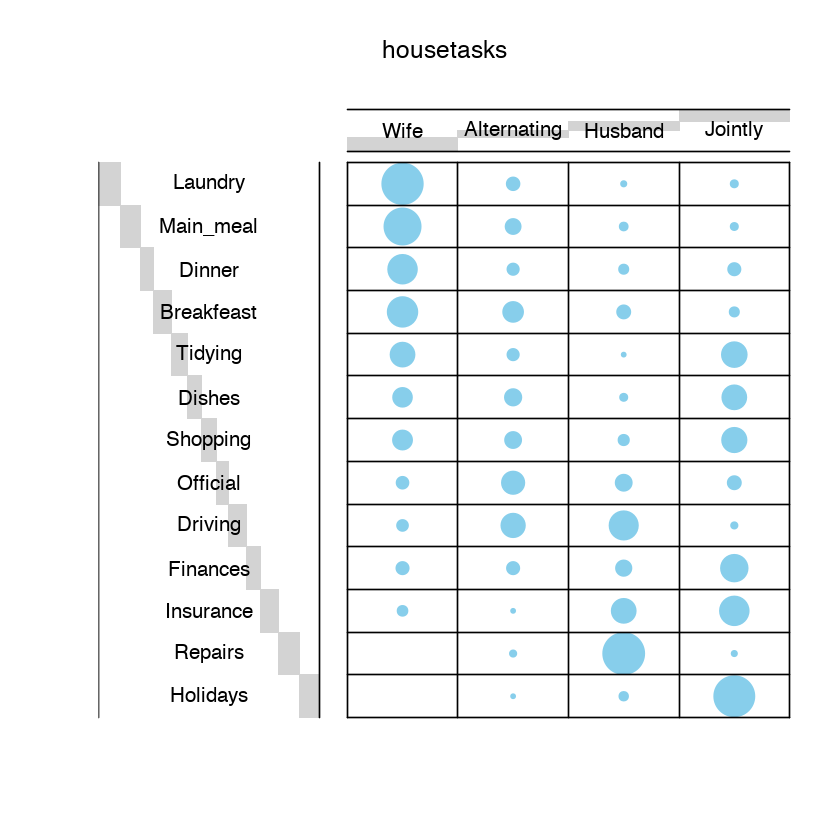

In [9]:
# 2. balloonplot() 으로 표시
balloonplot(t(dt), main="housetasks", xlab="", ylab="", label = F, show.margins = F)

교차표가 매우 큰 경우에는 그래프로 해석하는 것은 매우 힘들다. 이런 경우에는 CA 같은 것이 필요합니다.

## 중요 용어 정의
* Row margins: Row sum(row.sum) : 가로 합
* Column margins: Column sum(col.sum) : 세로 합
* Grand total : total sum of all values in the contigency table : 교차표 모든 값의 합

In [11]:
# Row margin
row.sum <- apply(housetasks, 1, sum)
row.sum

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
       176        153        108        140        122        113        120 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
        96        139        113        139        165        160

In [12]:
# column sum
col.sum <- apply(housetasks, 2, sum)
col.sum

Wife Alternating     Husband     Jointly 
        600         254         381         509

In [16]:
# grand total
n <- grand.total <- sum(housetasks)
n

[1] 1744

## 가로 를 나타내는 변수들

### Row Profile

Row profile 은 각 가로의 주변합 (margin) 으로 나눈 값이다 즉
$$ row.profile = \dfrac{row}{row.sum}$$
예를 들면 Laundry/Wife 세탁/주부 row.profile = 156/176 = 88.6% 이다.

In [14]:
row.profile <- housetasks / row.sum
row.profile

,Wife,Alternating,Husband,Jointly
Laundry,0.88636364,0.079545455,0.011363636,0.02272727
Main_meal,0.81045752,0.130718954,0.032679739,0.02614379
Dinner,0.71296296,0.101851852,0.064814815,0.12037037
Breakfeast,0.58571429,0.257142857,0.107142857,0.05000000
Tidying,0.43442623,0.090163934,0.008196721,0.46721311
Dishes,0.28318584,0.212389381,0.035398230,0.46902655
Shopping,0.27500000,0.191666667,0.075000000,0.45833333
Official,0.12500000,0.479166667,0.239583333,0.15625000
Driving,0.07194245,0.366906475,0.539568345,0.02158273
Finances,0.11504425,0.115044248,0.185840708,0.58407080


가로줄의 마지막에 에는 각 세로줄의 평균을 구한다. 이것은 average.rp 라고 표시 하고 
$$
average.rp = \dfrac{column.sum}{grand.total}
$$

In [17]:
# column sum
col.sum <- apply(housetasks, 2, sum)

# average row profile = column sums / grand total
average.rp <- col.sum/n
average.rp

Wife Alternating     Husband     Jointly 
  0.3440367   0.1456422   0.2184633   0.2918578

### row profile 사이의 거리 또는 유사도

두개의 가로줄 row1, row2 를 비교하려면, 그들 사이의 거리를 다음과 같이 정의 하여 사용합니다.

$$
d^2(row_1, row_2) = \sum\dfrac{(row.profile_1 - row.profile_2)^2}{average.profile}
$$

거리를 chi-square 거리 (카이제곱 거리) 라고 합니다.

예를 들어 세탁 (Laundary) 와 주식(Main_meal) 사이의 거리 또는 유사도는

$$
d^2(Laundary, Main_meal) = \dfrac{}{} + \dfrac{}{} + \cdots = 0.036
$$

이다.

In [23]:
# 몇가지 가로줄 사이의 거리를 구하는 예제들

# Laundry and Main_meal profiles
laundry.p <- row.profile["Laundry",]
main_meal.p <- row.profile["Main_meal",]

# distance between Laundry and Main_meal
d2 <- sum(((laundry.p - main_meal.p)^2)/average.rp)
d2

[1] 0.03684787

In [25]:
# Laundry 와 Driving 사이 거리
driving.p <- row.profile["Driving",]

# 세탁 가로줄과 거리
d2 <- sum(((laundry.p - driving.p)^2)/average.rp)
d2

[1] 3.772028

### 평균가로줄 row profile 과 각 가로줄과 거리

$$
d^2(row_i, average.profile) = \sum\dfrac{(row.profile_i - average.profile)^2}{average.profile}
$$

In [29]:
d2.row <- apply(row.profile, 1, function(row.p, av.p) {sum(((row.p - av.p)^2)/av.p)}, average.rp)
as.matrix(round(d2.row, 3))

Laundry,1.329
Main_meal,1.034
Dinner,0.618
Breakfeast,0.512
Tidying,0.353
Dishes,0.302
Shopping,0.218
Official,0.968
Driving,1.274
Finances,0.456
Insurance,0.727


가로줄에서 수선 (Repairs) 휴일(Holiday), 세탁(Laundry), 운전(Driving) 등은 평균에서 많이 떨어진 profile 입니다.

### 거리 행렬 (Distance Matrix)

In [39]:
# data: a data frame or matrix
# average.profile: average profile
dist.matrix <- function(data, average.profile) {
    mat <- as.matrix(t(data))
#    print(mat)
    n <- ncol(mat)
#    print (n)
    dist.mat <- matrix(NA, n, n)
    diag(dist.mat) <- 0

    for(i in 1:(n -1)) {
        for(j in (i + 1):n) {
            d2 <- sum(((mat[,i] - mat[,j])^2)/average.profile)
            dist.mat[i,j] <- dist.mat[j,i] <- d2
        }
    }
    colnames(dist.mat) <- rownames(dist.mat) <- colnames(mat)
    
    # return
    dist.mat
}

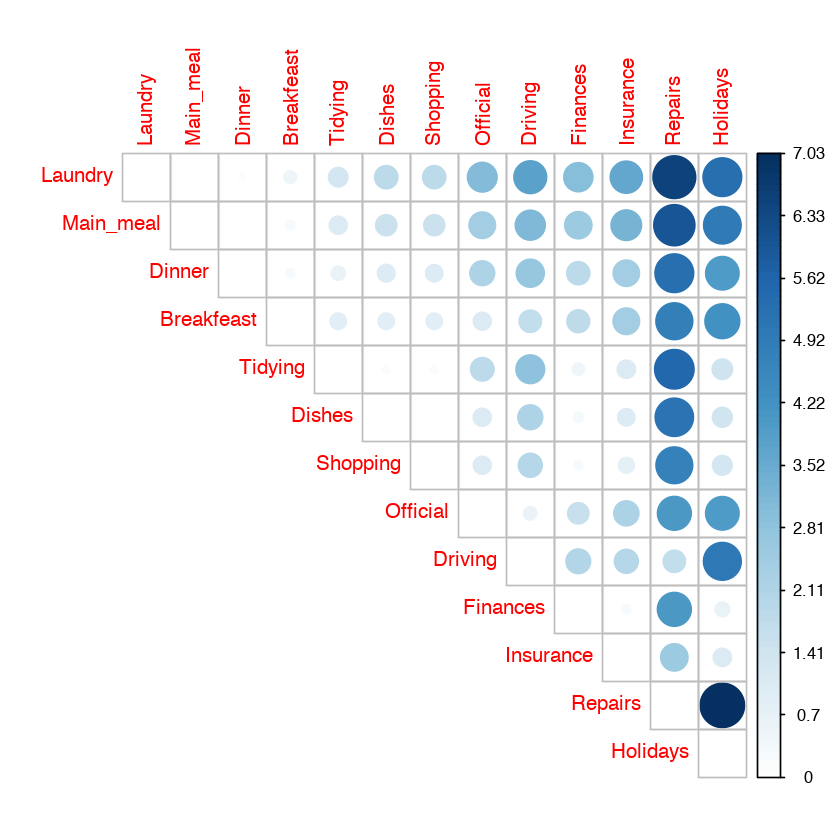

In [41]:
# 거리 행렬
dist.mat <- dist.matrix(row.profile, average.rp)
dist.mat <- round(dist.mat, 2)

#dist.mat
# visualization
library(corrplot)
corrplot(dist.mat, type="upper", is.corr = F)

원의 크기는 row.profile 사이의 거리에 비례합니다. 거리와 농도를 비교하여 원의 크기를 비교하여 쉽게 찾아 낼 수 있습니다.

### Row mass 과 inertia (가로 질량과 관성)

일반적으로 질량과 관성은 물리 용어이나, 통계에서 보면 수식의 유사성으로 인하여 관성과 질량의 개념을 차입해서 사용합니다.  
여기서 물리에서 질량은 질점의 질량을 말하기 보다는 바위나, 쇠구슬등의 강체에서 일종의 밀도 개념으로 봐야 합니다. 이것을 질량 밀도 라고 하는게 전체 질량을 무게로 표시합니다. 마찬가지로 가로 질량은 가로의 합을 전체 합으로 나눈 값을 말합니다.
통계에서 가로질량 (또는 가로 비중) 은

$$
row.mass = \dfrac{row.sum}{grand.total}
$$

In [42]:
row.sum <- apply(housetasks, 1, sum)
grand.total <- sum(housetasks)
row.mass <- row.sum / grand.total
row.mass

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
0.10091743 0.08772936 0.06192661 0.08027523 0.06995413 0.06479358 0.06880734 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
0.05504587 0.07970183 0.06479358 0.07970183 0.09461009 0.09174312

가로 관성은 가로 관성모멘트 입니다. 관성모멘트란 한점의 질량이 있을때, 질량에 거리를 곱합 값으로 회전력과 관계가 있습니다. 마찬가지로 통계에서 가로 질량에 원점으로 부터의 거리를 곱한 값으로 정합니다.

$$
row.inertia = row.mass \times d^2(row)
$$

통계에서 가로 또는 세로 관성은 그것을 포함하는 정보의 양이다. 따라서 total inertial (전체관성)은 데이터 테이블이 포함한 전체 관성이라고 할 수 있다.

In [43]:
row.inertia <- row.mass * d2.row
row.inertia

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
0.13415976 0.09069235 0.03824633 0.04112368 0.02466697 0.01958732 0.01497017 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
0.05330000 0.10150885 0.02956446 0.05793584 0.31287411 0.19631064

In [44]:
# 총 관성 total inertia
sum(row.inertia)

[1] 1.11494

### 가로변수 (Row) 정리

지금까지 정리한 row 를 테이블로 정리하면 다음과 같습니다.

In [45]:
row <- cbind.data.frame(d2 = d2.row, mass=row.mass, inertia = row.inertia)
round(row, 3)

,d2,mass,inertia
Laundry,1.329,0.101,0.134
Main_meal,1.034,0.088,0.091
Dinner,0.618,0.062,0.038
Breakfeast,0.512,0.080,0.041
Tidying,0.353,0.070,0.025
Dishes,0.302,0.065,0.020
Shopping,0.218,0.069,0.015
Official,0.968,0.055,0.053
Driving,1.274,0.080,0.102
Finances,0.456,0.065,0.030


## 세로를 나타내는 변수들 

### Column profiles (세로변수)

Column profile 은 row.profile 처럼 세로들의 주변합과 비율 입니다.

$$
col.profile = \dfrac{col}{col.sum}
$$


In [55]:
col.profile <- t(housetasks) / col.sum
col.profile <- as.data.frame(t(col.profile))

col.profile
cat("col.profile 합=", sum(col.profile)/dim(col.profile)[2], "\n\n")

,Wife,Alternating,Husband,Jointly
Laundry,0.26000000,0.055118110,0.005249344,0.007858546
Main_meal,0.20666667,0.078740157,0.013123360,0.007858546
Dinner,0.12833333,0.043307087,0.018372703,0.025540275
Breakfeast,0.13666667,0.141732283,0.039370079,0.013752456
Tidying,0.08833333,0.043307087,0.002624672,0.111984283
Dishes,0.05333333,0.094488189,0.010498688,0.104125737
Shopping,0.05500000,0.090551181,0.023622047,0.108055010
Official,0.02000000,0.181102362,0.060367454,0.029469548
Driving,0.01666667,0.200787402,0.196850394,0.005893910
Finances,0.02166667,0.051181102,0.055118110,0.129666012


col.profile 합= 1 



평균 column profile 은 가로변수들의 합으로 계산합니다.

$$
average.cp = \dfrac{row.sum}{grand.total}
$$

In [57]:
# Row sums
row.sum <- apply(housetasks, 1, sum)
row.sum

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
       176        153        108        140        122        113        120 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
        96        139        113        139        165        160

In [58]:
# 평균 세로 프로파일 = 가로합 / 합
average.cp <- row.sum / n
average.cp

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
0.10091743 0.08772936 0.06192661 0.08027523 0.06995413 0.06479358 0.06880734 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
0.05504587 0.07970183 0.06479358 0.07970183 0.09461009 0.09174312

### 컬럼 프로파일 사이 거리 (유사도) 

세로 열들을 비교 하려면, 가로열 비교 하듯이 거리를 다음과 같이 정의 하여 계량적으로 비교한다.

$$
d^2(col1, col2) = \sum \dfrac{(col.profile1 - col.profile2)^2}{average.profile}
$$

예를 들면
$$
d^2(Wife, Husband) = \dfrac{(0.26 - 0.005)^2}{0.10} + \dfrac{(0.21 - 0.013)^2}{0.09} + \cdots + \cdots = 4.05
$$

In [59]:
# Wife 와 Husband 프로파일
wife.p <- col.profile["Wife"]
husband.p <- col.profile["Husband"]

# Wife 와 Husband 사이거리
d2 <- sum(((wife.p - husband.p)^2)/average.cp)
d2

[1] 4.050311

### 각 세로 프로파일 (column profile) 과 평균 세로 프로파일 사이 거리

$$
d^2(col_i, average.profile) = \sum \dfrac{(col.profile_i - average.profile)^2}{average.profile}
$$

In [60]:
d2.col <- apply(col.profile, 2, 
               function(col.p, av.p){sum(((col.p - av.p)^2)/av.p)},
               average.cp)
round(d2.col, 3)

Wife Alternating     Husband     Jointly 
      0.875       0.809       1.746       1.078

### 거리 행렬 (Distance matrix)

In [61]:
dist.mat <- dist.matrix(t(col.profile), average.cp)
dist.mat <- round(dist.mat, 2)
dist.mat

,Wife,Alternating,Husband,Jointly
Wife,0.00,1.71,4.05,2.93
Alternating,1.71,0.00,2.67,2.58
Husband,4.05,2.67,0.00,3.70
Jointly,2.93,2.58,3.70,0.00


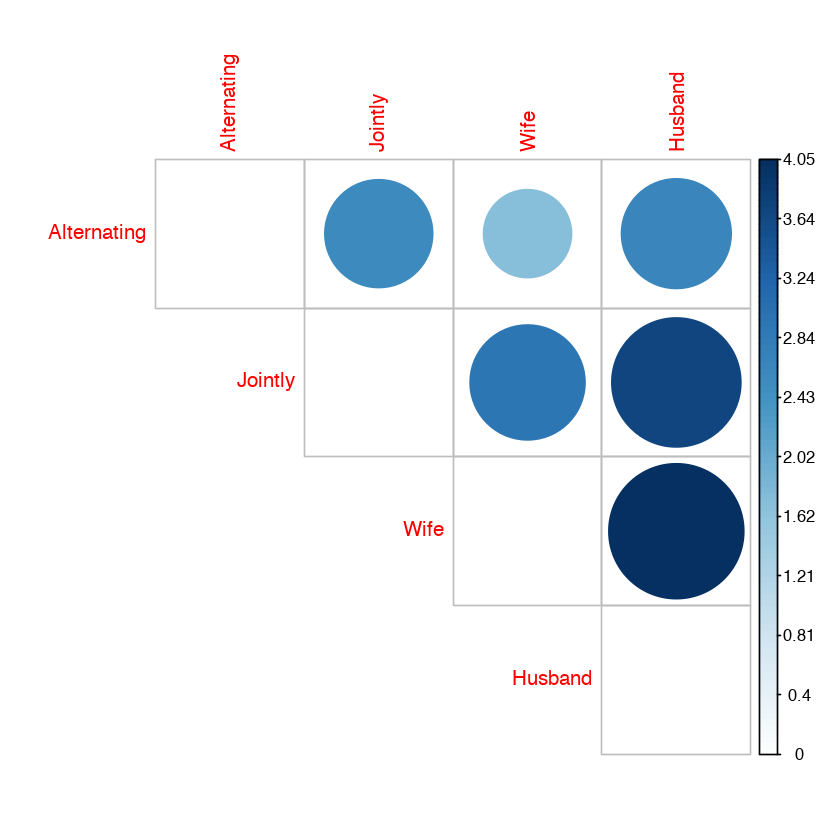

In [62]:
# 행렬을 그래프로 표시
library(corrplot)
corrplot(dist.mat, type = "upper", order = "hclust", is.corr = F)

### 세로질량 과 관성 (Column mass and Inertia)

세로질량 (또는 세로 비중)은 다음처럼 정의 합니다.

$$
col.mass = \dfrac{col.mass}{grand.total}
$$

In [63]:
col.sum <- apply(housetasks, 2, sum)
grand.total <- sum(housetasks)
col.mass <- col.sum/grand.total
col.mass

Wife Alternating     Husband     Jointly 
  0.3440367   0.1456422   0.2184633   0.2918578

세로 관성 (column inertia) 는 세로질량 에 평균 세로 프로파일의 제곱과 곱이다.

$$
col.inertial = col.mass \times d^2(col)
$$

In [64]:
col.inertia <- col.mass * d2.col
col.inertia

Wife Alternating     Husband     Jointly 
  0.3010185   0.1178242   0.3813729   0.3147248

In [65]:
# inertial 합은
sum(col.inertia)

[1] 1.11494

### 세로 변수 정리

In [66]:
col <- cbind.data.frame(d2 = d2.col, mass = col.mass, inertia = col.inertia)
round(col, 3)

,d2,mass,inertia
Wife,0.875,0.344,0.301
Alternating,0.809,0.146,0.118
Husband,1.746,0.218,0.381
Jointly,1.078,0.292,0.315


## 가로변수와 세로변수 연관 (Association between row and column variables)

교차표 가 작을 경우 쉽게 그래프로 가로, 세로 프로파일을 파악 할 수 있다. 위의 예를 보면
* 집안일 경우 세탁, 메인식사, 저녁 이 주로 주부에 의해서 행해진다.
* 수리와 운전은 남편에 의해서 행해진다.
* 휴일에는 종종 공동으로 집안일을 한다.

그러나 큰 교차표에서는 그래프로 한눈에 파악이 쉽지 않습니다. 따라서 분석하기 위한 여러 과정이 있습니다.  

이중에서 카이 제곱 테스트 독립성 검정이 좋은 방법 중에 하나입니다.

### 카이제곱 검정 (Chi-square test)

**카이제곱 검정** 은 교차표에서 통계적으로 유의한 관계가 있는지를 검정 하는 기법입니다.
* 영가설(귀무가설) $(H_0)$ : 교차표에서 가로, 세로 변수가 독립적이다.
* 대립가설 : $(H_1)$ : 가로 세로 변수가 종속적이다.

따라서 영가설 가정하에, 교차표 각 항목에 예상 값을 계산합니다. 예상값은 다음과 같이 계산합니다.

$$
e = \dfrac{row.sum * col.sum}{grand.total}
$$

카이제곱 통계량은 
$$
\chi^2 = \sum \dfrac{(o - e)^2}{e}
$$

* o : 관측 값
* e : 예측 값


카이제곱 통계량은 유의값 과 자유도 를 이용하여 비교합니다.
* 유의값 p = 0.05
* 자유도 $df = (r - 1)(c -1)$ 입니다.
   * r : 교차표에서 가로줄 곗수
   * c : 교차표에서 세로줄 갯수
   
카이제곱 통계량이 유의값 보다 작으면 교차표의 가로 세로 변수는 서로 독립적이지 않다. 
* 참고로 교차표의 각 셀에서 빈도 값은 5보다는 커야 합니다.

R 에선 카이제곱 검정 함수 chisq.test() 를 제공합니다.

In [67]:
chisq <- chisq.test(housetasks)
chisq


	Pearson's Chi-squared test

data:  housetasks
X-squared = 1944.5, df = 36, p-value < 2.2e-16


이 예에서 보면, 가로 세로 변수는 p-value 가 거의 0 이므로 유의값 0.5 보다 작다. 따라서 집안일과 부부역활은 매우 밀접한 관계가 있다고 할 수 있다.

카이제곱 통계량은 1944.5 입니다.

관측 과 예측된 값을 살펴보면

In [68]:
chisq$observed

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


In [70]:
# 예측값은 
round(chisq$expected, 2)

,Wife,Alternating,Husband,Jointly
Laundry,60.55,25.63,38.45,51.37
Main_meal,52.64,22.28,33.42,44.65
Dinner,37.16,15.73,23.59,31.52
Breakfeast,48.17,20.39,30.58,40.86
Tidying,41.97,17.77,26.65,35.61
Dishes,38.88,16.46,24.69,32.98
Shopping,41.28,17.48,26.22,35.02
Official,33.03,13.98,20.97,28.02
Driving,47.82,20.24,30.37,40.57
Finances,38.88,16.46,24.69,32.98


카이제곱 통계량은 1944.5 이다. 그러면 **교차표상의 어떤 항목들이 카이제곱 통계량에 영향을 많이 줄까?**  

이것은 다음에 계속 진행합니다.